In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
data_dir = '/content/drive/MyDrive/DATASET'
classes = ['tank,soldiers', 'base,plane']

In [5]:
# Load and preprocess image data
def load_and_preprocess_data(data_dir, classes, target_shape=(128, 128)):
    data = []
    labels = []

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg'):
                file_path = os.path.join(class_dir, filename)
                # Load and preprocess the image
                img = load_img(file_path, target_size=target_shape)
                img_array = img_to_array(img)
                data.append(img_array)
                labels.append(i)

    return np.array(data), np.array(labels)

# Split data into training and testing sets
data, labels = load_and_preprocess_data(data_dir, classes)
labels = to_categorical(labels, num_classes=len(classes))  # Convert labels to one-hot encoding
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [6]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam

# Define input shape
input_shape = X_train[0].shape

# Load the VGG19 model without the top layer and with pre-trained ImageNet weights
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the VGG19 base layers to retain pre-trained features
vgg19_base.trainable = False

# Add custom layers on top
x = Flatten()(vgg19_base.output)
x = Dense(64, activation='relu')(x)  # Fully connected layer
output_layer = Dense(len(classes), activation='softmax')(x)  # Output layer for classification

# Create the complete model
model = Model(inputs=vgg19_base.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# Summary of the model
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model on the test set
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy[1]}')

# Save the model
model.save('vgg19_classification_model.h5')

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,548,866 (78.39 MB)

 Trainable params: 524,482 (2.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 587s 9s/step - accuracy: 0.5573 - loss: 5.8535 - val_accuracy: 0.6467 - val_loss: 0.6245
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 648s 10s/step - accuracy: 0.7558 - loss: 0.5349 - val_accuracy: 0.7086 - val_loss: 0.5488
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 591s 9s/step - accuracy: 0.8172 - loss: 0.3890 - val_accuracy: 0.7206 - val_loss: 0.6011
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 615s 9s/step - accuracy: 0.8700 - loss: 0.3168 - val_accuracy: 0.7385 - val_loss: 0.5683
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 623s 9s/step - accuracy: 0.8995 - loss: 0.2529 - val_accuracy: 0.7265 - val_loss: 0.6815
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 621s 9s/step - accuracy: 0.9175 - loss: 0.2130 - val_accuracy: 0.7265 - val_loss: 0.7559
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 618s 9s/step - accuracy: 0.9173 - loss: 0.2115 - val_accuracy: 0.7445 - val_loss: 0.8486
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 613s 9s/step - accuracy: 0.9212 - loss: 0.1758 - val_accuracy: 0.7265 - 

Test accuracy: 0.7245509028434753


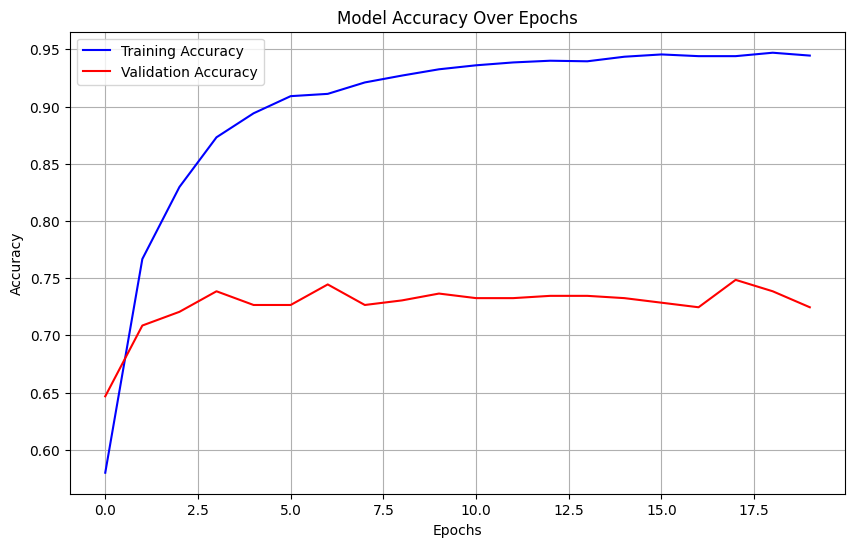

In [8]:
import matplotlib.pyplot as plt

# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
import glob

# Load your pre-trained VGG19 model
model = load_model('vgg19_classification_model.h5')

# Define the target shape as the shape used during training (128, 128)
target_shape = (128, 128)  # Ensure this matches your model's input size

# Define your class labels
classes = ['base,plane', 'tank,soldiers']

# Preprocessing function for VGG19
def preprocess_for_vgg19(img_array):
    return preprocess_input(img_array)

# Function to classify a single image
def test_image(file_path, model):
    try:
        # Load and preprocess the image
        img = load_img(file_path, target_size=target_shape)  # Ensure target size matches training input size
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = preprocess_for_vgg19(img_array)  # Preprocessing step for VGG19

        # Predict the class probabilities
        predictions = model.predict(img_array)

        # Get class probabilities for the first image in the batch (if batch processing)
        class_probabilities = predictions[0]

        # Get the index of the predicted class
        predicted_class_index = np.argmax(class_probabilities)

        # Get the name of the predicted class
        predicted_class = classes[predicted_class_index]

        return predicted_class, class_probabilities
    except Exception as e:
        print(f"Error processing image {file_path}: {e}")
        return None, None

# Function to classify all images in a folder
def classify_images_in_folder(folder_path, model):
    # Generate a list of image files in the folder (handle .jpg and other formats)
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))

    if not image_files:
        print("No images found in the specified directory.")
        return

    # Loop over all images in the folder
    for filename in image_files:
        print(f"\nProcessing image: {os.path.basename(filename)}")
        predicted_class, class_probabilities = test_image(filename, model)

        if predicted_class:
            print(f"Predicted Class: {predicted_class}")
            for i, class_label in enumerate(classes):
                probability = class_probabilities[i]
                print(f'  Class: {class_label}, Probability: {probability:.4f}')
        else:
            print(f"Skipped processing image: {filename} due to an error")

# Define folder path with test images (modify this path with the location of your images)
test_images_folder = '/content/drive/MyDrive/DATASET/test'  # Modify as necessary

# Call the function to classify all images in the folder
print("\nClassifying images in the folder:")
classify_images_in_folder(test_images_folder, model)



Classifying images in the folder:

Processing image: img553_jpg.rf.a81868ed6c6253037b2a0f41f7d14e69.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
Predicted Class: tank,soldiers
  Class: base,plane, Probability: 0.0081
  Class: tank,soldiers, Probability: 0.9919

Processing image: img1920_jpg.rf.82588fa23b4418017835d085989683b6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted Class: base,plane
  Class: base,plane, Probability: 1.0000
  Class: tank,soldiers, Probability: 0.0000

Processing image: mg144_jpg.rf.25d2f10522edf2aec453623d51c0f6d3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Predicted Class: base,plane
  Class: base,plane, Probability: 0.5306
  Class: tank,soldiers, Probability: 0.4694

Processing image: img0_jpg.rf.7d902340a5db3d37a362a2cbdd38a536.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
Predicted Class: tank,soldiers
  Class: base,plane, Probability: 0.0543
  Class: tank,soldiers, Probability: 0.9457

Processing image: img847_jpg.rf.b1d286a18f315d07226b8ed470c67fbf.jpg
1/1